## Cycle of Deep Learning Project 
1. Understanding The Problem
2. Data Collection
3. Data Analysis
4. Pre-processing Text Data
5. Build The Model

## 1. Understanding The Problem

To accurately classify online reviews as positive or negative, I developed a deep learning model (LSTM) capable of effectively capturing the sentiment expressed within text data. The model was designed to learn intricate patterns in language, enabling it to distinguish between reviews conveying satisfaction and those expressing dissatisfaction. By leveraging LSTM architectures, the model excels at processing and understanding the semantic and syntactic components of text,To Predict Positive or Negative Review in Accurate Way

## Importing Dependencies 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punct')
nltk.download('stopwords') ## in sentiment anaylsis we can not remove stop words like (not )
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Error loading punct: Package 'punct' not found in index
[nltk_data] Downloading package stopwords to C:\Users\Kimo
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Collection

In [2]:
## loading the data 
data = pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
## rows and columns 
data.shape

(50000, 2)

## 3. Data Analysis
1. Imbalance Data
2. Missing values
3. Duplicated Values
4. Number of Characters For Each Labels
5. Number of Words For Each Labels
6. Number of Sentence For Each Labels 

### 1. Imbalance Data


Text(0.5, 1.0, 'Distribtution in dataset')

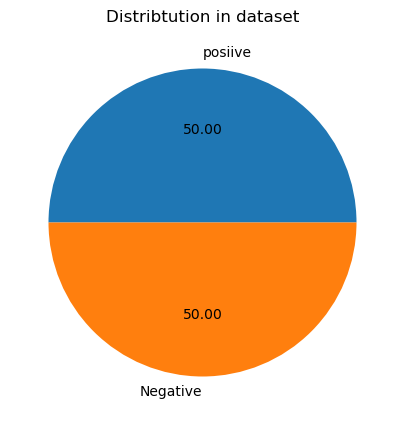

In [4]:
plt.figure(figsize =(16,5))
plt.subplot(121)
plt.pie(data['sentiment'].value_counts(),labels=['posiive' , 'Negative'] , autopct="%0.2f")
plt.title('Distribtution in dataset')


### 2. Missing values

In [5]:
print(f"nan value in data is \n{data.isnull().sum()}")

nan value in data is 
review       0
sentiment    0
dtype: int64



#### There is no nan values 

### 3. Duplicated Values

In [6]:
# train
print(f"duplicated value in data is \n{data.duplicated().sum()}")

duplicated value in data is 
418


In [7]:
## Drop duplicated values 
data.drop_duplicates(inplace = True , ignore_index=True )

### 4. Number of Characters For Each Labels


In [8]:
data['Num_Char'] = data['review'].apply(len)

In [9]:
data['Num_word'] = data['review'].apply(lambda x : len(nltk.word_tokenize(x)))

In [10]:
data['Num_sent'] = data['review'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [11]:
data.head(10)

,review,sentiment,Num_Char,Num_word,Num_sent
0,One of the other reviewers has mentioned that ...,positive,1761,380,10
1,A wonderful little production. <br /><br />The...,positive,998,201,7
2,I thought this was a wonderful way to spend ti...,positive,926,205,4
3,Basically there's a family where a little boy ...,negative,748,175,6
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,283,9
5,"Probably my all-time favorite movie, a story o...",positive,656,145,6
6,I sure would like to see a resurrection of a u...,positive,726,158,1
7,"This show was an amazing, fresh & innovative i...",negative,934,203,9
8,Encouraged by the positive comments about this...,negative,681,154,7
9,If you like original gut wrenching laughter yo...,positive,176,45,3


In [12]:
## Create data for positive and negative
positive = data[data['sentiment'] =='positive']

negative = data[data['sentiment'] =='negative']

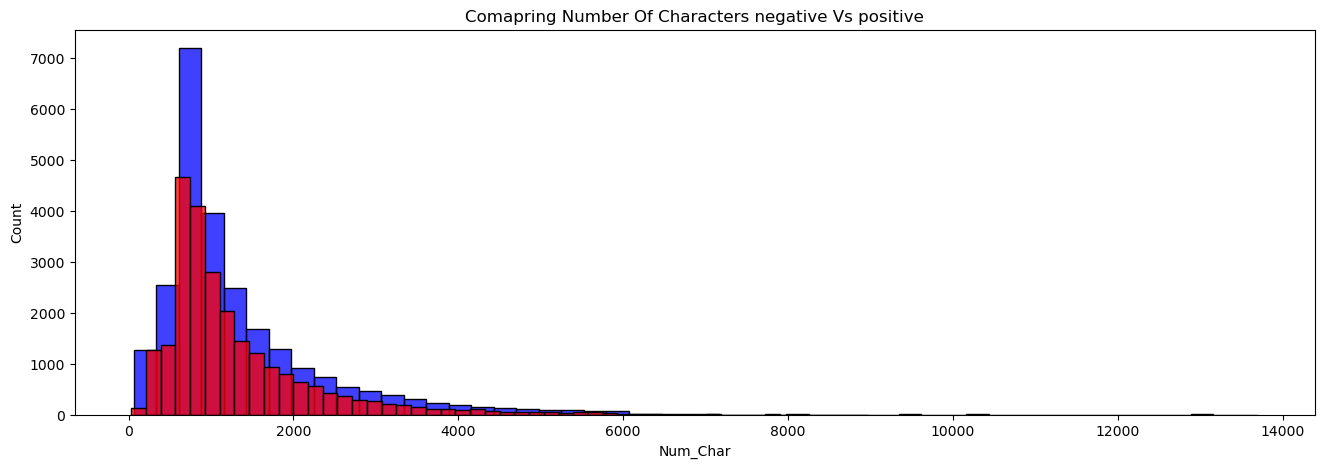

In [13]:
## Showing the differance between negative and positive data regarding the num_char 
plt.figure(figsize=(16,5))
sns.histplot(positive['Num_Char'] , bins=50 , color='blue')
sns.histplot(negative['Num_Char'] , bins=50 ,color='red')
plt.title('Comapring Number Of Characters negative Vs positive')
plt.show()


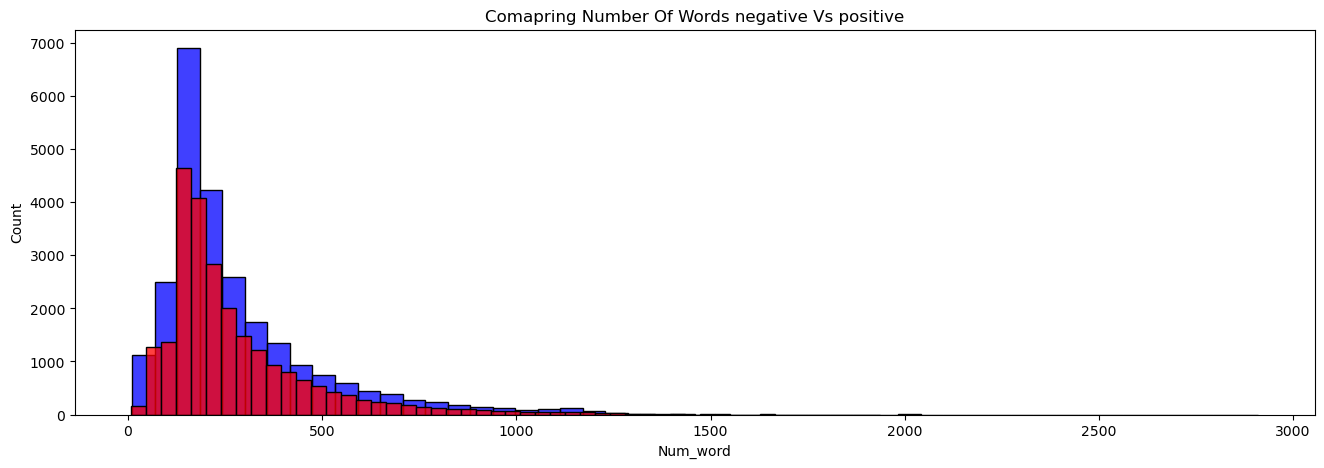

In [14]:
## Showing the differance between negative and positive data regarding the num_word 
plt.figure(figsize=(16,5))
sns.histplot(positive['Num_word'] , bins=50 , color='blue')
sns.histplot(negative['Num_word'] , bins=50 ,color='red')
plt.title('Comapring Number Of Words negative Vs positive')
plt.show()


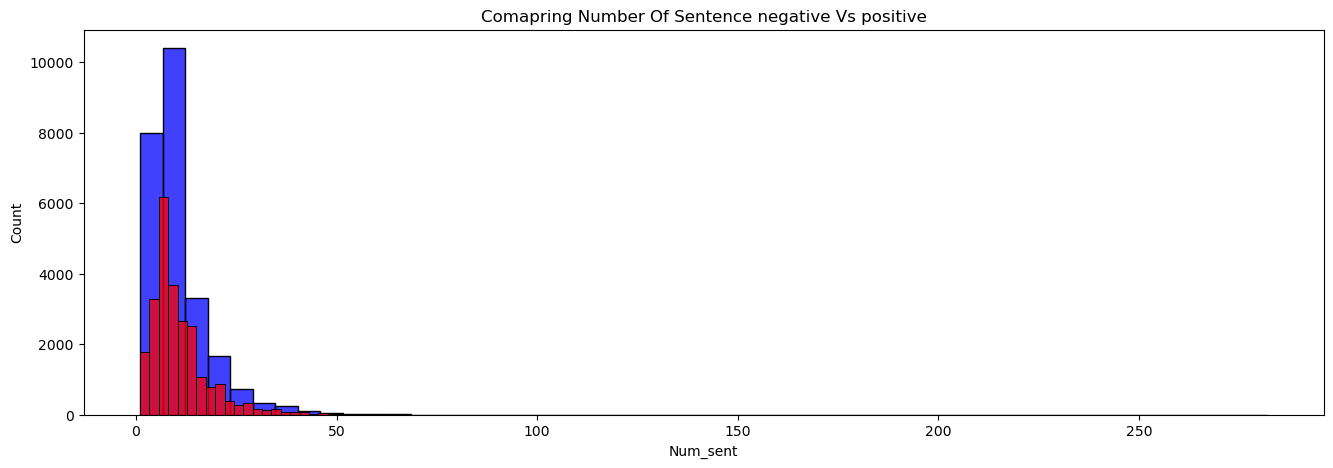

In [15]:
## Showing the differance between negative and positive data regarding the num_sentence 
plt.figure(figsize=(16,5))
sns.histplot(positive['Num_sent'] , bins=50 , color='blue')
sns.histplot(negative['Num_sent'] , bins=50 ,color='red')
plt.title('Comapring Number Of Sentence negative Vs positive')
plt.show()


### Conclusion
#### Positive Reviews have More Number of Charaters Words and Sentence Than Negative 

## 4. Pre-processing Text Data
1. positive ==1
2. Negative == 0

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential ## to create neural network
from tensorflow.keras.layers import Dense # to create layers and units
from tensorflow.keras.layers import  Embedding # to convert text to vector
from tensorflow.keras.layers import  LSTM ## prevent vanshing gradient problem
from tensorflow.keras.preprocessing.text import one_hot ## assigns number for each unique word vocablary size
from tensorflow.keras.preprocessing.sequence import pad_sequences # to make all sentens same length
from tensorflow.keras.preprocessing.text import Tokenizer
import gensim

In [17]:
## convert labels to numbers 
data['sentiment'] = data['sentiment'].apply(lambda x : 1 if x == 'positive' else 0)

In [18]:
data.head(5)

,review,sentiment,Num_Char,Num_word,Num_sent
0,One of the other reviewers has mentioned that ...,1,1761,380,10
1,A wonderful little production. <br /><br />The...,1,998,201,7
2,I thought this was a wonderful way to spend ti...,1,926,205,4
3,Basically there's a family where a little boy ...,0,748,175,6
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283,9


In [19]:
## Spliting The Data Into Train And Split 
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42 , shuffle=True)

In [20]:
print(train_data.shape)
print(test_data.shape)

(39665, 5)
(9917, 5)


### Tokeniazation

In [21]:
## create object for tokenizer 
vocab_size = 5000
tokenizer = Tokenizer(num_words=5000) ## most commen words 
tokenizer.fit_on_texts(train_data['review'])

In [22]:
## using pad sequence to make all same length 
max_len = 800
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['review']) , maxlen=max_len)

In [23]:
## maxlength sentence 
max_length = max(data['review'].apply(lambda x:np.max(len(nltk.word_tokenize(x)))))
print(max_length)

2911


In [24]:
print(X_train)

[[   0    0    0 ...  352  202  134]
 [   0    0    0 ... 4247    2 2721]
 [   0    0    0 ...  414   25  195]
 ...
 [   0    0    0 ...    3  454  156]
 [   0    0    0 ...  244  103  126]
 [   0    0    0 ...    4    1 2902]]


In [25]:
y_train = train_data["sentiment"]
y_test = test_data["sentiment"]

## 5.Build The Model 

In [26]:
features_vector = 128 
model = Sequential()
model.add(Embedding(input_dim=vocab_size ,output_dim= features_vector , input_length=max_len))
model.add(LSTM(128,dropout = 0.2  , recurrent_dropout = 0.2))
model.add(Dense(1 , activation='sigmoid'))

## Compile The Model To Update Weights And optimize The Accurcy
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

## early stopping to not overfitting
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

## train the model
model.fit(X_train , y_train ,epochs=5 , batch_size=64 , validation_split=0.2 , callbacks=[early_stop] )



Epoch 1/5


496/496 [==============================] - ETA: 0s - loss: 0.4258 - accuracy: 0.8077WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000200807DDC60> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x00000200807DDC60>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x00000200807DDC60>. Note that functions defined in certain environments, like the in

### Test Data

In [27]:
## make all sentences same length 
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['review']) , maxlen=max_len)

## Model Evaluation

In [28]:
loss , accuracy = model.evaluate(X_test , y_test)
print(f"Accuracy is {accuracy}")

310/310 [==============================] - 90s 289ms/step - loss: 0.3212 - accuracy: 0.8837
Accuracy is 0.8837350010871887


In [29]:
## make prediction 
pred = model.predict(X_test)
pred = [1 if i > 0.5 else 0 for i in pred]

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020080D6E660>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000020080D6E660>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Orig

In [30]:
from sklearn.metrics import classification_report , confusion_matrix , roc_auc_score


loss , accuracy = model.evaluate(X_test , y_test)

print(f"Accuracy Score is : {accuracy}")
print("------------------------------------------------------------------------------")

print(f"Auc Score is : {roc_auc_score(y_test , pred)}")
print("------------------------------------------------------------------------------")

print(f"Confusion_Matrix Score is : \n{confusion_matrix(y_test , pred)}")
print("------------------------------------------------------------------------------")

print(f"Classification_Report Score is : {classification_report(y_test , pred)}")


310/310 [==============================] - 63s 202ms/step - loss: 0.3212 - accuracy: 0.8837
Accuracy Score is : 0.8837350010871887
------------------------------------------------------------------------------
Auc Score is : 0.8838248080987403
------------------------------------------------------------------------------
Confusion_Matrix Score is : 
[[4478  461]
 [ 692 4286]]
------------------------------------------------------------------------------
Classification_Report Score is :               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4939
           1       0.90      0.86      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



## Prediction System 

In [31]:
def prediction(text):
    # 1- tokeniazation
    feature = tokenizer.texts_to_sequences([text])

    # 2- padding 
    padding_features = pad_sequences(feature , maxlen=max_len)

    # 3- make prediction 
    prediction = model.predict(padding_features)

    # 4- output 
    sentiment = 'Positive' if prediction[0][0] > 0.5 else 'Negative'
    
    return  sentiment

In [32]:
# example usage unseen data (positive)
new_review = "The movie is an interesting commentary on the internet being a distraction of stupidity.It leads people to their deaths, but people are addicted to watching others demise that it creates a sort of circle of dysfunction...Ultimately, I was engrossed as a sort of VHS style found footage genre offering, but it did have a few interesting things to say on the entitled society we live in today, of easy gratification, replacement of impersonal and fear based living behind a screen for the beauty of the natural world.It's available on demand, which is apropos to the plot point of the story."
sentiment = prediction(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 [==============================] - 0s 183ms/step
The sentiment of the review is: Positive


In [33]:
# example usage unseen data (Negative)
new_review ="It's the worst film in the world. DICTATOR Erdogan's disgusting movie. Turkey is a liar . The film consists of lies and God save Turkey from this disgusting man. Very bad film.He's enemy for art and world culture this movie is big lying ERDOGAN is a Common enemy of the world. **peace at home peace at world.**"
sentiment = prediction(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 [==============================] - 0s 194ms/step
The sentiment of the review is: Negative


## Save The Model

In [34]:
model.save('model.h5')